# Exploratory Data Analysis

---

![banner](banner.jpg)

---

## Content Table
- [1. Environment Preparation](#0.-Environment-Preparation)
- [2. Data Exploration](#2.-Data-Exploration)
- [2. Data Analysis](#2.-Data-Analysis)

### Project Overview
This notebook focuses on exploring and analyzing the **GTSRB dataset** to gain insights into its structure, distributions, and potential preprocessing needs for the road sign classification task.

### Objectives
- Understand the structure of the dataset.
- Analyze class distributions and identify any imbalances.
- Prepare data for preprocessing by checking for missing values, outliers, and anomalies.

### Dataset
The **GTSRB dataset** consists of 50,000+ labeled road sign images across various classes. The goal is to explore this dataset to better inform model development.

### Dependencies
- **Python**, **Pandas**, **Matplotlib**, **Seaborn**

## 1. Evironment Preparation

In [1]:
import re
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
data_path = "Data/archive"

---

## 2. Data Exploration

Classes definitions

In [11]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [3]:
train_data_path = "Data/archive/" # Path to the training data
image_size = (64, 64) # Target image size for the model
model_export_path = "Model/traffic_sign_classifier.keras" # Path to save the model
model_path = "Model/traffic_sign_classifier.keras" # Path to load the model

In [4]:
def load_data(meta_data, data_path, image_size, is_test=False):
    """
    Loads and preprocesses image data for training or testing.

    Parameters:
    meta_data (pd.DataFrame): A DataFrame containing metadata about the images, including file paths and class IDs.
    data_path (str): The base directory path where the image files are located.
    image_size (tuple): The target size for resizing the images (width, height).
    is_test (bool): A flag indicating whether the data is for testing. If True, the labels are not one-hot encoded.

    Returns:
    tuple: A tuple containing:
        - X (np.ndarray): An array of preprocessed images.
        - Y (np.ndarray): An array of labels, either one-hot encoded or as class IDs depending on the is_test flag.
    """
    # Encode labels as one-hot vectors if not in test mode, otherwise use class IDs directly
    Y = (
        keras.utils.to_categorical(meta_data["ClassId"])
        if not is_test
        else meta_data["ClassId"]
    )
    
    # Load and preprocess images
    X = np.array(
        [
            np.array(
                # Read image, convert from BGR to RGB, resize to target size
                cv2.resize(cv2.imread(data_path + path)[..., ::-1], image_size),
                dtype=np.float64,
            )
            for path in tqdm(meta_data.Path)  # Iterate over all image paths with a progress bar
        ]
    )
    
    # Return preprocessed images and labels
    return X, Y

In [14]:
train_meta_data = pd.read_csv("Data/archive/Train.csv")
train_meta_data = train_meta_data[["ClassId", "Path"]]
print("Loading training data...")
X, Y = load_data(train_meta_data, train_data_path, image_size)
print(f"Loaded {len(X)} training samples.")

Loading training data...


100%|██████████| 39209/39209 [05:37<00:00, 116.02it/s]


Loaded 39209 training samples.


### All 43 classes road signs with definitions

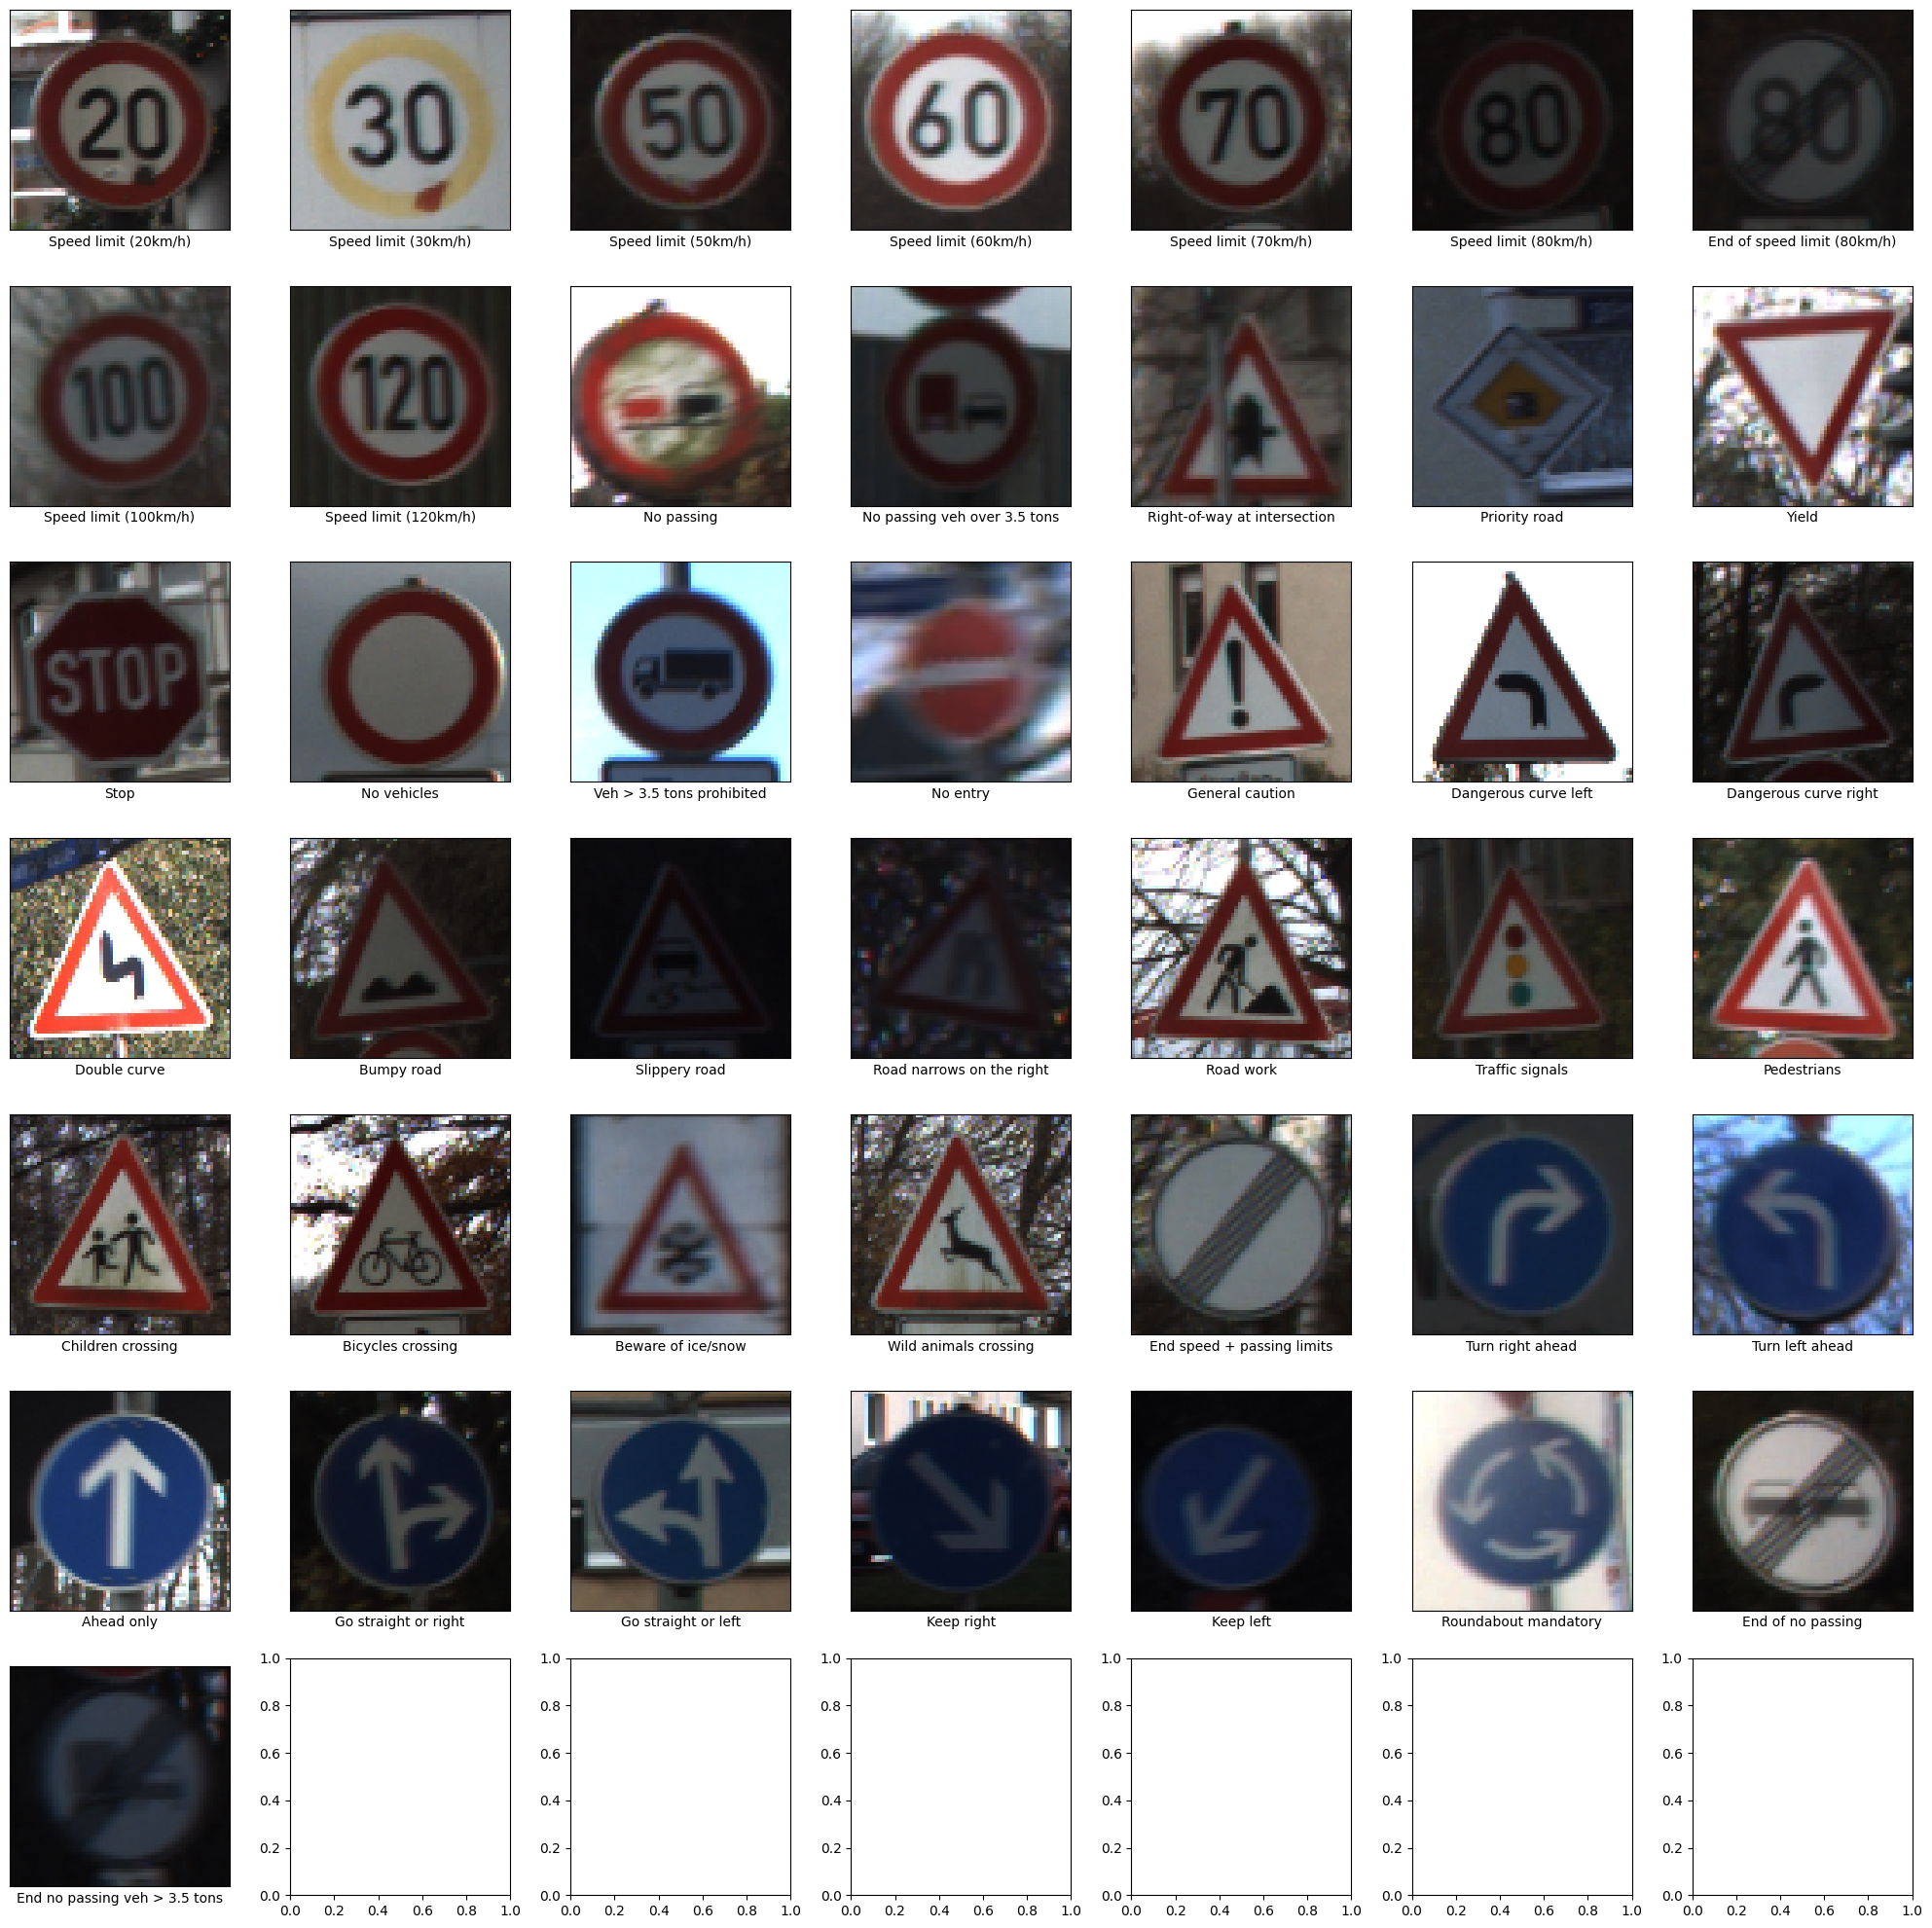

In [15]:
def plot_one_image_per_class(meta_data, X, classes):
    unique_classes = sorted(meta_data.ClassId.unique())  # Sort the unique class IDs in ascending order
    fig, axes = plt.subplots(7, 7, figsize=(20, 20))  # Create a 7x7 grid to display 43 images
    
    # Initialize index for iterating through the grid
    ax_idx = 0
    for class_id in unique_classes:
        # Find the index of the last occurrence of each `ClassId`
        index = meta_data[meta_data.ClassId == class_id].index[-1]
        
        # Display the corresponding image in the grid
        ax = axes[ax_idx // 7, ax_idx % 7] # Locate the subplot position in the 7x7 grid
        ax.imshow(X[index] / 255) # Show the image (normalized to [0, 1] range)
        ax.set_xlabel(classes[class_id])  # Set the class name as the label below the image
        ax.set_xticks([])  # Remove x-axis ticks for better visibility
        ax.set_yticks([])  # Remove y-axis ticks for better visibility
        
        # Move to the next cell in the grid
        ax_idx += 1
    
    plt.tight_layout() # Adjust the layout to prevent overlapping of subplots
    plt.show() # Display the grid of images

# Call the function
plot_one_image_per_class(train_meta_data, X, classes)


In [5]:
train_set_meta = pd.read_csv(f"{data_path}/Train.csv")
train_set_meta.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [22]:
test_set_meta = pd.read_csv(f"{data_path}/Test.csv")
test_set_meta.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [23]:
columns = [col for col in train_set_meta.columns if not col.startswith("Roi")]
train_set_meta = train_set_meta[columns]
test_set_meta = test_set_meta[columns]

In [24]:
train_set_meta.isna().sum()

Width      0
Height     0
ClassId    0
Path       0
dtype: int64

In [25]:
test_set_meta.isna().sum()

Width      0
Height     0
ClassId    0
Path       0
dtype: int64

In [26]:
len(train_set_meta),len(test_set_meta)

(39209, 12630)

---

## 3. Data Analysis

In [29]:
px.bar(train_set_meta["ClassId"].value_counts(), title="Train Set Class Distribution", labels={"index":"ClassId", "value":"Count"})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=count<br>ClassId=%{x}<br>Count=%{y}<extra></extra>',
              'legendgroup': 'count',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'count',
              'offsetgroup': 'count',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 2,  1, 13, 12, 38, 10,  4,  5, 25,  9,  7,  3,  8, 11, 18, 35, 17, 14,
                          31, 33, 15, 26, 28, 23, 30, 16,  6, 34, 22, 36, 40, 20, 21, 39, 29, 24,
                          32, 27, 41, 42, 37,  0, 19], dtype=int64),
              'xaxis': 'x',
              'y': array([2250, 2220, 2160, 2100, 2070, 2010, 1980, 1860, 1500, 1470, 1440, 1410,
                          1410, 1320, 1200, 1200, 1110,  780,  780,  689,  630,  600,  540,  510,
                           450,  420,  420,  420,  390,  390,  360,  360,  330,  300,  270,  270,
                           240,  240,  240,  240,  210,  210,  210], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Train Set Class Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'ClassId'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}}}
})

In [30]:
px.bar(test_set_meta["ClassId"].value_counts(), title="Test Set Class Distribution", labels={"index":"ClassId", "value":"Count"})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=count<br>ClassId=%{x}<br>Count=%{y}<extra></extra>',
              'legendgroup': 'count',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'count',
              'offsetgroup': 'count',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 2,  1, 13, 38, 12,  4, 10,  5,  9, 25,  3,  8,  7, 11, 35, 18, 17, 31,
                          14, 15, 33, 26, 30, 16, 28,  6, 23, 22, 36, 34, 24, 29, 20, 40, 21, 39,
                          42, 32, 27, 41, 19,  0, 37], dtype=int64),
              'xaxis': 'x',
              'y': array([750, 720, 720, 690, 690, 660, 660, 630, 480, 480, 450, 450, 450, 420,
                          390, 390, 360, 270, 270, 210, 210, 180, 150, 150, 150, 150, 150, 120,
                          120, 120,  90,  90,  90,  90,  90,  90,  90,  60,  60,  60,  60,  60,
                           60], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Test Set Class Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'ClassId'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}}}
})

In [72]:
fig= px.box(train_set_meta[['Width', 'Height']], title="Train Set Image Size Distribution")
fig.update_traces(boxmean=True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'boxmean': True,
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['Width', 'Width', 'Width', ..., 'Height', 'Height', 'Height'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([27, 28, 29, ..., 62, 69, 69]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Train Set Image Size Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [74]:
fig = px.box(test_set_meta[['Width', 'Height']], title="Train Set Image Size Distribution")
fig.update_traces(boxmean=True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'boxmean': True,
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['Width', 'Width', 'Width', ..., 'Height', 'Height', 'Height'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([53, 42, 48, ..., 29, 49, 31]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Train Set Image Size Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## Number of unique original pictures per class

In [6]:
import os

# Extraire les quatre chiffres du milieu et la classe
train_set_meta['SerieId'] = train_set_meta['Path'].apply(lambda x: os.path.basename(x).split('_')[1])

# Compter les séries uniques par classe
series_count = train_set_meta.groupby('ClassId')['SerieId'].nunique()

# Trier les résultats et s'assurer que toutes les classes de 0 à 43 sont présentes
all_classes = pd.Series(index=range(43), data=0)
series_count = series_count.combine(all_classes, max, fill_value=0)
series_count.index = series_count.index.astype(int)  # Convertir l'index en entiers
series_count = series_count.sort_index()
# Afficher les résultats
for class_id, count in series_count.items():
    print(f"Classe {class_id:2d}: {count:3d} séries uniques")

Classe  0:   7 séries uniques
Classe  1:  74 séries uniques
Classe  2:  75 séries uniques
Classe  3:  47 séries uniques
Classe  4:  66 séries uniques
Classe  5:  62 séries uniques
Classe  6:  14 séries uniques
Classe  7:  48 séries uniques
Classe  8:  47 séries uniques
Classe  9:  49 séries uniques
Classe 10:  67 séries uniques
Classe 11:  44 séries uniques
Classe 12:  70 séries uniques
Classe 13:  72 séries uniques
Classe 14:  26 séries uniques
Classe 15:  21 séries uniques
Classe 16:  14 séries uniques
Classe 17:  37 séries uniques
Classe 18:  40 séries uniques
Classe 19:   7 séries uniques
Classe 20:  12 séries uniques
Classe 21:  11 séries uniques
Classe 22:  13 séries uniques
Classe 23:  17 séries uniques
Classe 24:   9 séries uniques
Classe 25:  50 séries uniques
Classe 26:  20 séries uniques
Classe 27:   8 séries uniques
Classe 28:  18 séries uniques
Classe 29:   9 séries uniques
Classe 30:  15 séries uniques
Classe 31:  26 séries uniques
Classe 32:   8 séries uniques
Classe 33: